# García LSB Dataset generation

In [1]:
import GarciaLSB, os, cv2, time, random
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

In [2]:
def ImagePath(imPath):
    return os.path.abspath(os.path.join(folder, imPath))
def Image(imPath):
    return mpimg.imread(ImagePath(imPath))
def SavePath(imPath):
    return os.path.abspath(os.path.join(datasetFolder, imPath))
def rgb2gray(rgb):
    return np.round(np.dot(rgb[...,:3], [0.2990 , 0.5870 , 0.1140 ])).astype(int)

In [3]:
folder="../../../ColorSamples/VirginSample"
datasetFolder="../../../Dataset/GarciaLSB_Mono/"
images=os.listdir(folder)
imgCount=len(images)
random.shuffle(images)

In [4]:
path=images[0]
newPath="stego_"+path
img=rgb2gray(Image(path))
steg,changes=GarciaLSB.Stego(rgb2gray(Image(path)),0.5,getChanges=True)
cv2.imwrite(SavePath(newPath),steg)
print("Changes: {}".format(changes))

Changes: 8192


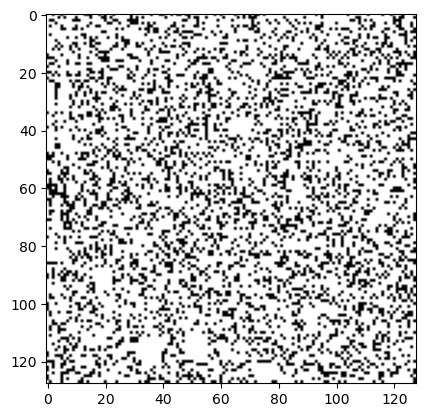

In [5]:
plt.imshow(GarciaLSB.diff(img,steg),cmap="gray")
plt.show()

In [ ]:
print("Stego")
t = time.time()
for cStego in range(imgCount//2):
    path=images.pop()
    newPath="stego_"+path
    cv2.imwrite(SavePath(newPath),GarciaLSB.Stego(rgb2gray(Image(path)),0.5))
for cCover in range(imgCount//2,imgCount):
    path=images.pop()
    cv2.imwrite(SavePath(path),rgb2gray(Image(path)))

Stego


In [ ]:
elapsed = time.time() - t
print(elapsed)
print("Done")